<a href="https://colab.research.google.com/github/it5joys135/ML-Projects/blob/main/TF_Long_Distance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow.keras.layers import Input, Dense, SimpleRNN, Flatten, GRU, LSTM, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

In [ ]:
# Build the dataset
# This is nonlinear and long distance datastet
# Actually, we will test long distance vs short distance dataset patters

# Start with small t and increase it later
T = 10
D = 1
X = []
Y = []

def get_label(x, i1, i2, i3):
    if x[i1] < 0 and x[i2] < 0 and x[i3] < 0:
        return 1
    if x[i1] < 0 and x[i2] > 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] < 0 and x[i3] > 0:
        return 1
    if x[i1] > 0 and x[i2] > 0 and x[i3] < 0:
        return 1
    return 0

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    # y = get_label(x, -1, -2, -3) # Short Distance
    y = get_label(x, 0, 1, 2) # Long Distance
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [ ]:
# Try a linear model first- Note: It is a classification now!
i = Input(shape=(T,))
x = Dense(1, activation='sigmoid')(i)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)

# train the network
r = model.fit(X, Y, epochs=100, validation_split=0.5)

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5099 - loss: 0.8581 - val_accuracy: 0.4816 - val_loss: 0.7279
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5087 - loss: 0.6998 - val_accuracy: 0.4904 - val_loss: 0.6973
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5146 - loss: 0.6939 - val_accuracy: 0.4872 - val_loss: 0.6968
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4933 - loss: 0.6937 - val_accuracy: 0.4928 - val_loss: 0.6975
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5180 - loss: 0.6935 - val_accuracy: 0.4952 - val_loss: 0.6962
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4980 - loss: 0.6950 - val_accuracy: 0.4872 - val_loss: 0.6968
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5056 - loss: 0.6954 - val_accuracy: 0.4900 - val_loss: 0.6983
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5284 - loss: 0.6909 - val_accuracy: 0.4912 - v

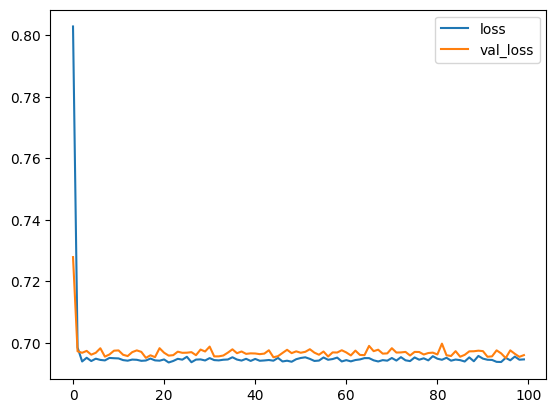

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

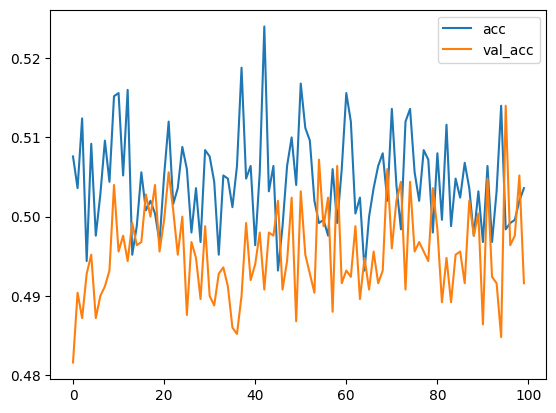

In [ ]:
# Plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Now try a SimpleRNN
inputs = np.expand_dims(X, -1)
# Make the RNN
i = Input(shape=(T, D))
# Method 1
# x = LSTM(5)(i)
x = SimpleRNN(5)(i)
# x = GRU(5)(i)

# Method 2
# x = LSTM(5, return_sequences=True)(i)
# x = GlobalMaxPooling1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    # optimizer='rmsprop',
    # optimizer='adam',
    optimizer=Adam(learning_rate=0.01),
    # optimizer=SGD(learning_rate=0.1, momentum=0.9),
    metrics=['accuracy'],
)

In [ ]:
# train the RNN model
r = model.fit(inputs, Y, epochs=200, validation_split=0.5)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.4864 - loss: 0.7228 - val_accuracy: 0.5056 - val_loss: 0.6936
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5070 - loss: 0.6956 - val_accuracy: 0.5104 - val_loss: 0.6960
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5196 - loss: 0.6945 - val_accuracy: 0.5072 - val_loss: 0.6937
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.4931 - loss: 0.6945 - val_accuracy: 0.5096 - val_loss: 0.6935
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4847 - loss: 0.6936 - val_accuracy: 0.4984 - val_loss: 0.6951
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5141 - loss: 0.6951 - val_accuracy: 0.4884 - val_loss: 0.6955
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5216 - loss: 0.6933 - val_accuracy: 0.4788 - val_loss: 0.6981
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5097 - loss: 0.6940 - val_accuracy: 0.4936 

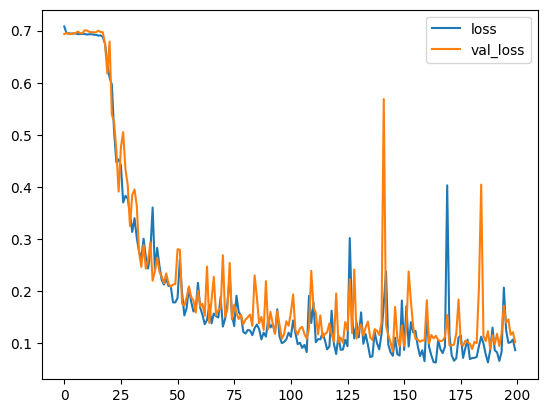

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

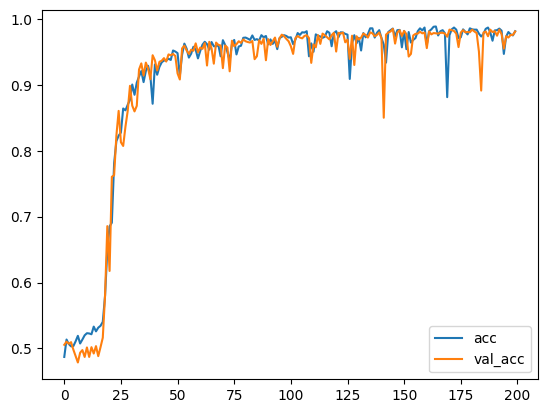

In [ ]:
# Plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)
# Make the RNN
i = Input(shape=(T, D))
# Method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)

# train the model
r = model.fit(inputs, Y, epochs=200, validation_split=0.5)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - accuracy: 0.4810 - loss: 0.6953 - val_accuracy: 0.4832 - val_loss: 0.6972
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5210 - loss: 0.6923 - val_accuracy: 0.4832 - val_loss: 0.6968
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5152 - loss: 0.6919 - val_accuracy: 0.4816 - val_loss: 0.6958
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5116 - loss: 0.6871 - val_accuracy: 0.5620 - val_loss: 0.6834
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5826 - loss: 0.6751 - val_accuracy: 0.6132 - val_loss: 0.6584
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6413 - loss: 0.6393 - val_accuracy: 0.6668 - val_loss: 0.6022
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6845 - loss: 0.5905 - val_accuracy: 0.7104 - val_loss: 0.5568
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7022 - loss: 0.5625 - val_accuracy: 0.728

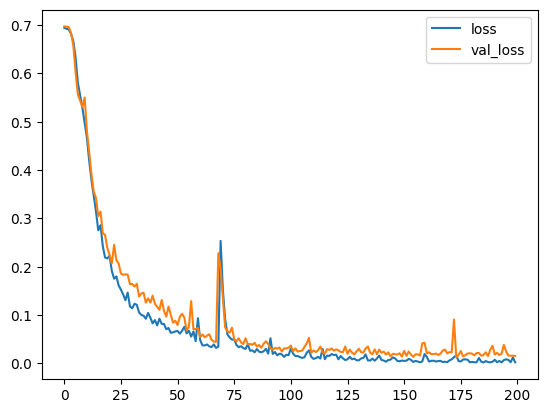

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

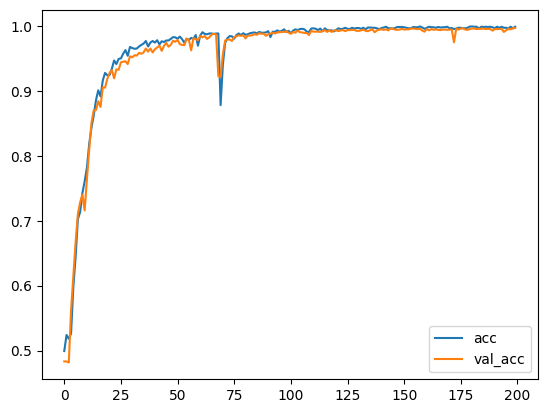

In [ ]:
# Plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Make the problem harder by making T larger
T = 20
D = 1
X = []
Y = []

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    # y = get_label(x, -1, -2, -3) # Short Distance
    y = get_label(x, 0, 1, 2) # Long Distance
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [ ]:
# Now test our simple RNN again
inputs = np.expand_dims(X, -1)
# Make the RNN
i = Input(shape=(T, D))
# Method 1
x = SimpleRNN(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)

# train the model
r = model.fit(inputs, Y, epochs=200, validation_split=0.5)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.4928 - loss: 0.7349 - val_accuracy: 0.5080 - val_loss: 0.6942
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4783 - loss: 0.6983 - val_accuracy: 0.5028 - val_loss: 0.6946
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5062 - loss: 0.6930 - val_accuracy: 0.4976 - val_loss: 0.6952
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5144 - loss: 0.6920 - val_accuracy: 0.5056 - val_loss: 0.6936
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5104 - loss: 0.6939 - val_accuracy: 0.5008 - val_loss: 0.6955
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5040 - loss: 0.6943 - val_accuracy: 0.4896 - val_loss: 0.6964
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5025 - loss: 0.6970 - val_accuracy: 0.4980 - val_loss: 0.6988
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5104 - loss: 0.6940 - val_accuracy: 0.494

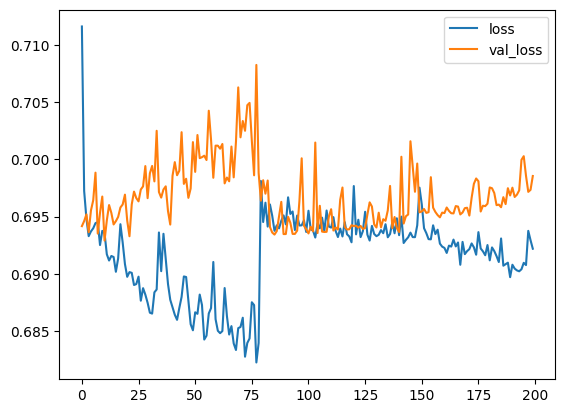

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

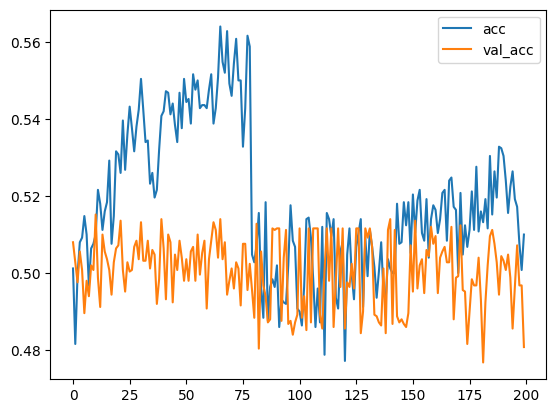

In [ ]:
# Plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)
# Make the RNN
i = Input(shape=(T, D))
# Method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)

# train the model
r = model.fit(inputs, Y, epochs=200, validation_split=0.5)

Epoch 1/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5005 - loss: 0.6923 - val_accuracy: 0.4912 - val_loss: 0.6955
Epoch 2/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5198 - loss: 0.6916 - val_accuracy: 0.4824 - val_loss: 0.6961
Epoch 3/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4968 - loss: 0.6932 - val_accuracy: 0.4836 - val_loss: 0.6969
Epoch 4/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.4875 - loss: 0.6937 - val_accuracy: 0.4976 - val_loss: 0.6965
Epoch 5/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5251 - loss: 0.6906 - val_accuracy: 0.5044 - val_loss: 0.6968
Epoch 6/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5433 - loss: 0.6889 - val_accuracy: 0.4976 - val_loss: 0.6965
Epoch 7/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5396 - loss: 0.6901 - val_accuracy: 0.4976 - val_loss: 0.6961
Epoch 8/200
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5109 - loss: 0.6913 - val_accuracy: 0.

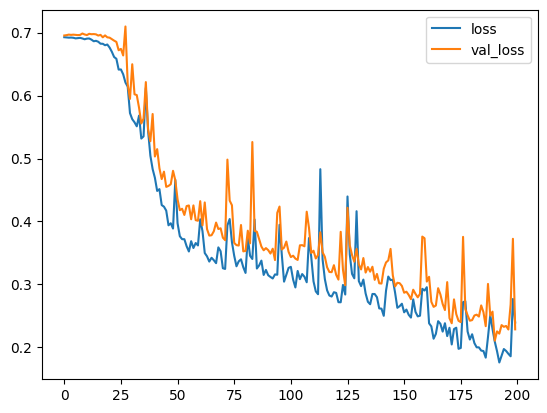

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

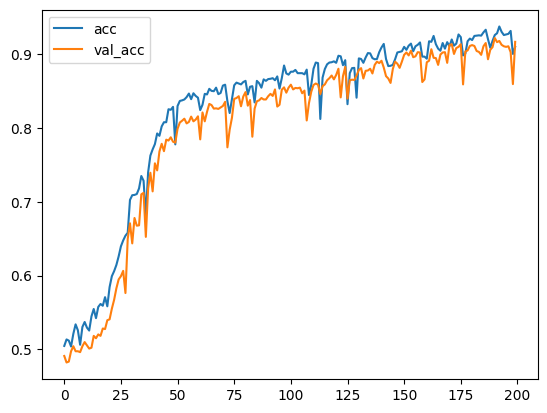

In [ ]:
# Plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Now test our GRU
inputs = np.expand_dims(X, -1)
# Make the RNN
i = Input(shape=(T, D))
# Method 1
x = GRU(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)

# train the model
r = model.fit(inputs, Y, epochs=400, validation_split=0.5)

Epoch 1/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.4903 - loss: 0.6954 - val_accuracy: 0.4920 - val_loss: 0.6964
Epoch 2/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5079 - loss: 0.6949 - val_accuracy: 0.4900 - val_loss: 0.6953
Epoch 3/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.5182 - loss: 0.6927 - val_accuracy: 0.4920 - val_loss: 0.6952
Epoch 4/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5185 - loss: 0.6917 - val_accuracy: 0.4932 - val_loss: 0.6956
Epoch 5/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5176 - loss: 0.6924 - val_accuracy: 0.5024 - val_loss: 0.6955
Epoch 6/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5049 - loss: 0.6924 - val_accuracy: 0.4960 - val_loss: 0.6946
Epoch 7/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5203 - loss: 0.6923 - val_accuracy: 0.4892 - val_loss: 0.6959
Epoch 8/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5206 - loss: 0.6918 - val_accuracy: 0.

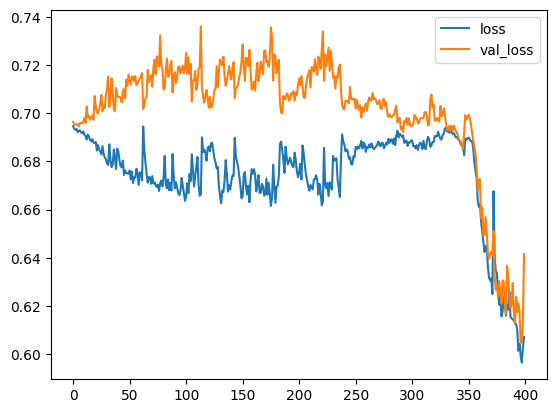

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

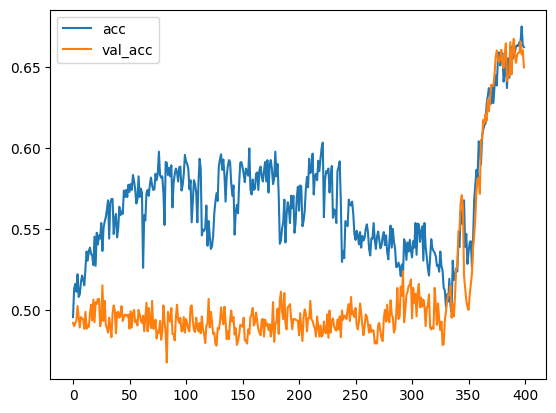

In [ ]:
# Plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

In [ ]:
# Make the problem harder by making T larger
T = 30
D = 1
X = []
Y = []

for t in range(5000):
    x = np.random.randn(T)
    X.append(x)
    # y = get_label(x, -1, -2, -3) # Short Distance
    y = get_label(x, 0, 1, 2) # Long Distance
    Y.append(y)

X = np.array(X)
Y = np.array(Y)
N = len(X)

In [ ]:
# Now test our LSTM
inputs = np.expand_dims(X, -1)
# Make the RNN
i = Input(shape=(T, D))
# Method 1
x = LSTM(5)(i)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)

# train the model
r = model.fit(inputs, Y, epochs=400, validation_split=0.5)

Epoch 1/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - accuracy: 0.5066 - loss: 0.6943 - val_accuracy: 0.4948 - val_loss: 0.6940
Epoch 2/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.4940 - loss: 0.6943 - val_accuracy: 0.4948 - val_loss: 0.6934
Epoch 3/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5085 - loss: 0.6925 - val_accuracy: 0.5096 - val_loss: 0.6933
Epoch 4/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.4955 - loss: 0.6936 - val_accuracy: 0.5004 - val_loss: 0.6933
Epoch 5/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5095 - loss: 0.6926 - val_accuracy: 0.5012 - val_loss: 0.6936
Epoch 6/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5162 - loss: 0.6921 - val_accuracy: 0.4984 - val_loss: 0.6937
Epoch 7/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.5147 - loss: 0.6926 - val_accuracy: 0.4940 - val_loss: 0.6938
Epoch 8/400
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5195 - loss: 0.6924 - val_accuracy: 0.

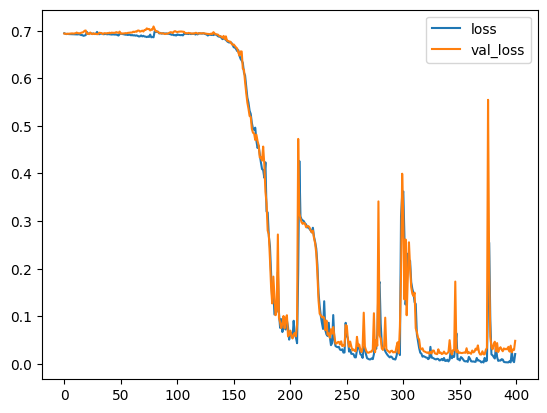

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

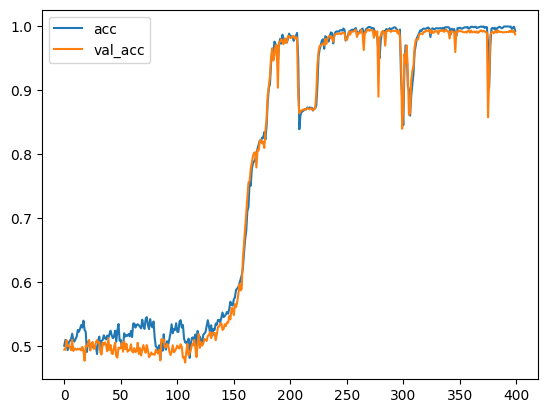

In [ ]:
# Plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

In [ ]:
# Now try LSTM with GlobalMaxpooling1D()
inputs = np.expand_dims(X, -1)
# Make the RNN
i = Input(shape=(T, D))

# Method 2
x = LSTM(5, return_sequences=True)(i)
x = GlobalMaxPooling1D()(x)

x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.01),
    metrics=['accuracy'],
)

# train the model
r = model.fit(inputs, Y, epochs=100, validation_split=0.5)

Epoch 1/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5035 - loss: 0.6943 - val_accuracy: 0.5096 - val_loss: 0.6933
Epoch 2/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5133 - loss: 0.6928 - val_accuracy: 0.4976 - val_loss: 0.6932
Epoch 3/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5164 - loss: 0.6929 - val_accuracy: 0.5084 - val_loss: 0.6931
Epoch 4/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5147 - loss: 0.6918 - val_accuracy: 0.5116 - val_loss: 0.6929
Epoch 5/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.5127 - loss: 0.6916 - val_accuracy: 0.5296 - val_loss: 0.6904
Epoch 6/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5248 - loss: 0.6878 - val_accuracy: 0.4860 - val_loss: 0.6877
Epoch 7/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.5208 - loss: 0.6892 - val_accuracy: 0.5460 - val_loss: 0.6830
Epoch 8/100
79/79 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5529 - loss: 0.6747 - val_accuracy: 0.

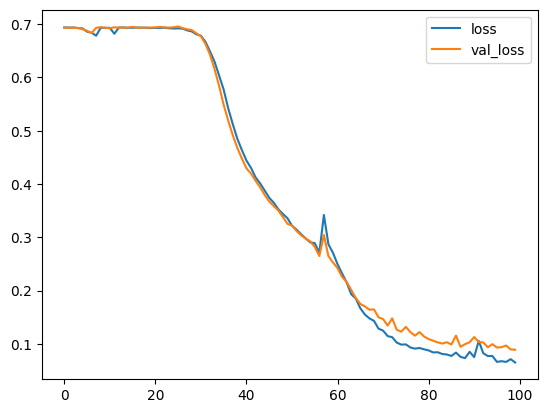

In [ ]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

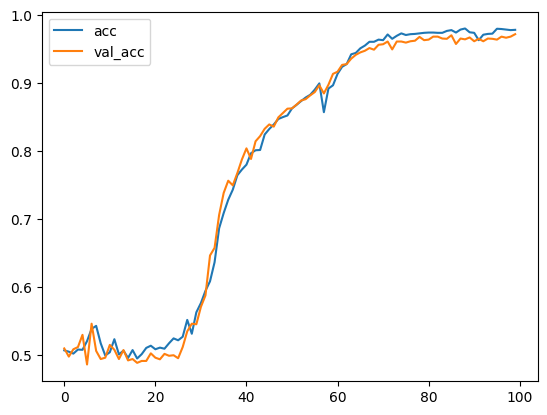

In [ ]:
# Plot the accuracy
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();